In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# generate some random data
num_points = 20
theta0 = 2
theta1 = 0;
x = np.linspace(-1, 1, num_points)
y = theta0 + (theta1 * x)


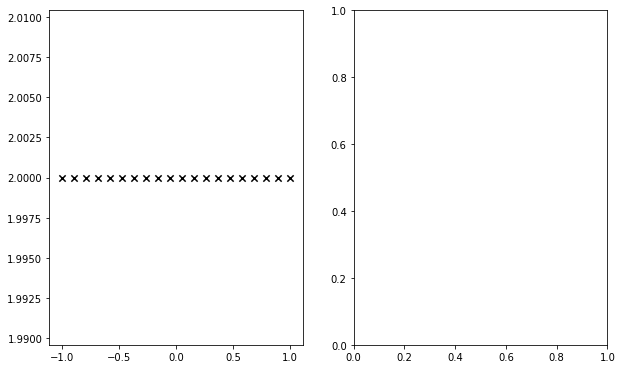

In [21]:
# table where LHS contains the data and the RHS represents the cost function
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_function(theta0, theta1):
    "The cost function for linear regression that uses Mean Least Squares"
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    
    return np.average((y - hypothesis(x, theta0, theta1)) ** 2, axis = 2) / 2

def hypothesis(x, theta0, theta1):
    return theta0 + theta1 * x


In [22]:
# define grids for the contour plot graph
theta0_grid = np.linspace(-1, 4, 101)
theta1_grid = np.linspace(-5, 5, 101)
J_grid = cost_function(theta0_grid[np.newaxis,:,np.newaxis],
                       theta1_grid[:, np.newaxis, np.newaxis])

# Cost Function Contour Plot Graph
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)

# labels for the cost function contour plot graph
ax[1].scatter([theta0] * 2, [theta1] * 2, s= [50, 10], color = ['k', 'w'])

In [23]:
# Training the model starting at theta0 = 0 and theta1 = 0
num_iters = 5
learning_rate = 0.7
theta = [np.array((0, 0))]
J = [cost_function(*theta[0])[0]]
for k in range(num_iters - 1):
    previous_theta = theta[-1]
    current_theta = np.empty((2,))
    current_theta[0] = previous_theta[0] - learning_rate / num_points * np.sum(
                                                                        (hypothesis(x, *previous_theta) - y))
    current_theta[1] = previous_theta[1] - learning_rate / num_points * np.sum(
                                                                        (hypothesis(x, *previous_theta) - y) * x)
    theta.append(current_theta)
    J.append(cost_function(*current_theta))


In [24]:
# draw graphs
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color = colors[0], lw = 2,
          label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))

for i in range(1, num_iters):
    ax[1].annotate('', xy=theta[i], xytext=theta[i-1], arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[i]), color=colors[i], lw=2, 
               label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[i]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

In [27]:
# Labels for the graphs
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height), fontsize='small')

plt.show()